Ridge Regression at alpha=7993.51
Mean Squared Error: 0.0680
R-squared: 0.1129
Top 5 important features at alpha ≈ 8000: ['GenHealth_Poor' 'Age_80 or older' 'DiffWalking' 'Stroke' 'Diabetic']


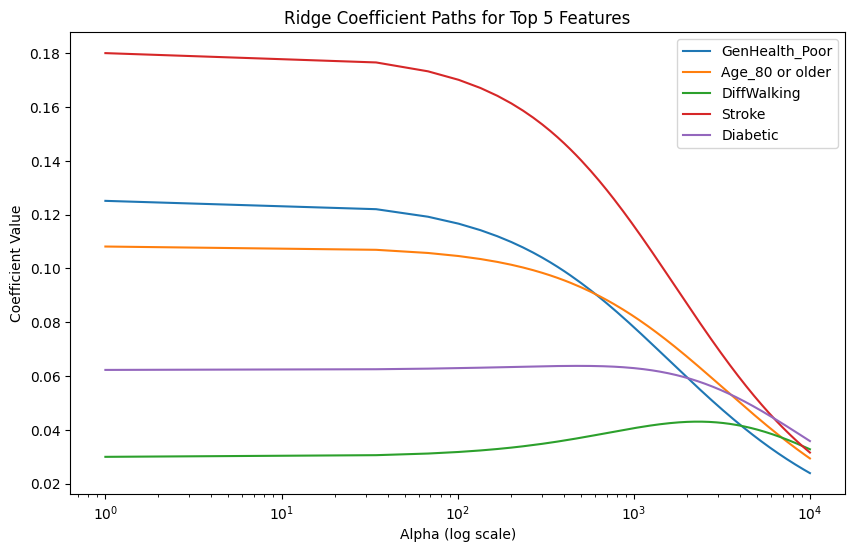

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\Michael Antonucci\OneDrive\Documents\MISY331 Final Project\heart_cleaned_final.csv")

# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Range of alpha values
alphas = np.linspace(1, 10000, 300)

coefs = []

# Fit Ridge regression for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

# Evaluate Ridge model at alpha ~ 8000
alpha_index = np.abs(alphas - 8000).argmin()
ridge_final = Ridge(alpha=alphas[alpha_index])
ridge_final.fit(X_train_scaled, y_train)

# Predictions and performance
y_pred = ridge_final.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression at alpha={alphas[alpha_index]:.2f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Top 5 most influential features at alpha ~8000
top_5_indices = np.argsort(np.abs(coefs[alpha_index]))[-5:]
top_5_features = np.array(X.columns)[top_5_indices]
print("Top 5 important features at alpha ≈ 8000:", top_5_features)

# Spaghetti plot for top 5 features
plt.figure(figsize=(10, 6))
for i in top_5_indices:
    plt.plot(alphas, coefs[:, i], label=X.columns[i])

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficient Paths for Top 5 Features")
plt.legend()

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Prepare your data
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_continuous = ridge.predict(X_test)

# Convert continuous output to binary labels (threshold at 0.5)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

# Print results
print("Ridge Regression Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Ridge Regression Evaluation Metrics:
Accuracy : 0.9189
Precision: 0.6154
Recall   : 0.0484

Confusion Matrix:
[[9149   25]
 [ 786   40]]
